In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
np.set_printoptions(suppress=True)

# CMPE482 Spring 2021 - Assignment 4
## Ege Can KAYA - 2018400018
### Question 1

**a.** We start out by computing the matrices $A^TA$ and $AA^T$. Keeping in mind that the eigenvectors of $A^TA$ are the columns of $V$, eigenvectors of $AA^T$ are the columns of $U$, and the square roots of the eigenvalues (of either matrix, since they have the exact same eigenvalues) correspond to the non-zero entries of the $\Sigma$ matrix. Also, we make sure to sort the eigenvalues in descending order, as is the convention, and order their corresponding eigenvectors accordingly.

In [2]:
A = np.array([[1, 6],
             [0, -1],
             [-1, -2]])

# Compute the AtA and AAt square matrices
AtA = A.T.dot(A)
AAt = A.dot(A.T)

# Compute the eigenvector decompositions of the two matrices
w1, v1 = np.linalg.eig(AtA)
w2, u1 = np.linalg.eig(AAt)

# Sort the eigenvalues and their corresponding eigenvectors in descending order
idx1 = w1.argsort()[::-1]   
w1 = w1[idx1]

# Eigenvectors of AtA correspond to the V matrix
V = v1[:,idx1]

idx2 = w2.argsort()[::-1]   
w2 = w2[idx2]

# Eigenvectors of AAt correspond to the V matrix
U = u1[:,idx2]

# Matrix of the same dimensions as A and with square-root of eigenvalues on the main diagonal gives us the Sigma matrix
Sigma = np.array([[np.sqrt(w1[0]), 0],
                [0, np.sqrt(w1[1])],
                [0, 0]])

# Now computing SVD by NumPy's method
u, s, v = np.linalg.svd(A)

# Print our decomposition first, and then NumPy's decomposition for comparison
print("U = ")
print(U)
print("Sigma = ")
print(Sigma)
print("Vt = ")
print(V.T)

print("U by np.linalg.svd = ")
print(u)
print("Sigma by np.linalg.svd = ")
print(s)
print("Vt by np.linalg.svd = ")
print(v)

U = 
[[-0.93180061  0.2760291  -0.23570226]
 [ 0.15035942 -0.2974948  -0.94280904]
 [ 0.33036293  0.9139501  -0.23570226]]
Sigma = 
[[6.52512367 0.        ]
 [0.         0.65020081]
 [0.         0.        ]]
Vt = 
[[-0.19343136 -0.98111381]
 [-0.98111381  0.19343136]]
U by np.linalg.svd = 
[[ 0.93180061 -0.2760291   0.23570226]
 [-0.15035942  0.2974948   0.94280904]
 [-0.33036293 -0.9139501   0.23570226]]
Sigma by np.linalg.svd = 
[6.52512367 0.65020081]
Vt by np.linalg.svd = 
[[ 0.19343136  0.98111381]
 [ 0.98111381 -0.19343136]]


Upon inspection, we realize that we have the exact same results in magnitude, however NumPy's V and U matrices are the negatives of our V and U matrices. Also, notice that NumPy orders the eigenvalues and eigenvectors in descending order just as we have, and it also takes the transpose of $V^T$. Last but not least, NumPy returns a vector of eigenvalues instead of the conventional diagonal $\Sigma$ matrix.

**b.** By the Spectral Theorem, since both $A^TA$ and $AA^T$ are symmetric square matrices with entries from $\mathbb{R}$, there exist orthonormal bases of the corresponding vector space consisting of eigenvector of $A$, and furthermore we know that each eigenvalue is real. This confirms that orthogonal $U$ and $V$ indeed exist.

**c.** We multiply $V^T$ on the left by the first row of $\Sigma$, and then the result on the left by the first column of $U$. Since we had ordered our eigenvalues in descending order, this corresponds to the approximation by the largest singular value. We compute:

In [3]:
Ahat = U[:,0].reshape((3,1)).dot(
    Sigma[0,:].reshape((1,2)).dot(
        V.T))
Ahat

array([[ 1.17608476,  5.96528403],
       [-0.18977818, -0.96258431],
       [-0.41697205, -2.1149468 ]])

We have done a a rank-1 approximation. We need to compute $\left\Vert A-\hat{A}(1)\right\Vert_2$, that is, the spectral norm of the error of our approximation. Notice that $A-\hat{A}(1) = \sum_{i=2}^3 \sigma_i u_i v_i^T$, that is, it is the sum of the remaining rank-1 matrices. Then, by Theorem 4.24 in our book, $\left\Vert A-\hat{A}(1)\right\Vert_2$ is the largest singular value of $A-\hat{A}(1)$, which is the second largest singular value of $A$, i.e., $\sigma_2$. We can see this with the following computation:

In [4]:
# Calculate the largest singular value of the error matrix
error = A - Ahat
w, v = np.linalg.eig(error.dot(error.T))
sing = np.sqrt(np.max(w))
print(sing)

# Check whether it is within a tolerable distance of our previous second largest singular value

np.isclose(sing, s[1])


0.6502008087060549


True

### Question 2

**a.** Using rotation matrices to write our 12 vectors, we have:

In [5]:
X = np.array([[1, 0],
             [np.cos(np.pi/6), np.sin(np.pi/6)],
             [np.cos(np.pi/3), np.sin(np.pi/3)],
             [np.cos(np.pi/2), np.sin(np.pi/2)],
             [np.cos(2*np.pi/3), np.sin(2*np.pi/3)],
             [np.cos(5*np.pi/6), np.sin(5*np.pi/6)],
             [np.cos(np.pi), np.sin(np.pi)],
             [np.cos(7*np.pi/6), np.sin(7*np.pi/6)],
             [np.cos(4*np.pi/3), np.sin(4*np.pi/3)],
             [np.cos(3*np.pi/2), np.sin(3*np.pi/2)],
             [np.cos(5*np.pi/3), np.sin(5*np.pi/3)],
             [np.cos(11*np.pi/6), np.sin(11*np.pi/6)]])
X

array([[ 1.       ,  0.       ],
       [ 0.8660254,  0.5      ],
       [ 0.5      ,  0.8660254],
       [ 0.       ,  1.       ],
       [-0.5      ,  0.8660254],
       [-0.8660254,  0.5      ],
       [-1.       ,  0.       ],
       [-0.8660254, -0.5      ],
       [-0.5      , -0.8660254],
       [-0.       , -1.       ],
       [ 0.5      , -0.8660254],
       [ 0.8660254, -0.5      ]])

**b.** Here is what the plotted vectors look like:

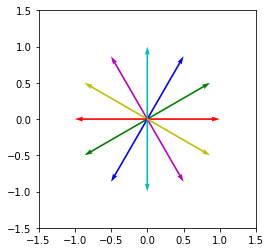

In [6]:
def plot_X():
    tail = np.zeros((2, 12))
    fig, ax = plt.subplots(1)
    ax.quiver(*tail,
               X[:, 0],
               X[:, 1],
               scale=1,
               scale_units='xy',
               angles = 'xy',
             color = ['r', 'g', 'b', 'c', 'm', 'y'])

    ax.set_xlim((-1.5, 1.5))
    ax.set_ylim((-1.5, 1.5))
    plt.gca().set_aspect('equal', adjustable='box')

plot_X()

**c.** Multiplying each vector with $V^T$, we have the following plot:

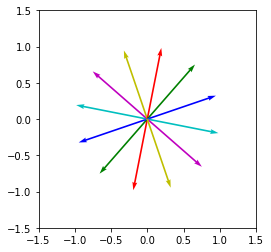

In [7]:
def plot_VTX():
    Yt = V.T.dot(X.T)
    Y = Yt.T

    tail = np.zeros((2, 12))
    fig, ax = plt.subplots(1)
    ax.quiver(*tail,
               Y[:, 0],
               Y[:, 1],
               scale=1,
               scale_units='xy',
               angles = 'xy',
             color = ['r', 'g', 'b', 'c', 'm', 'y'])

    ax.set_xlim((-1.5, 1.5))
    ax.set_ylim((-1.5, 1.5))
    plt.gca().set_aspect('equal', adjustable='box')
    
    return Y

Y = plot_VTX()

**d.** Now moving on by multiplying our vectors by $\Sigma$, we have the following 3-dimensional plot:

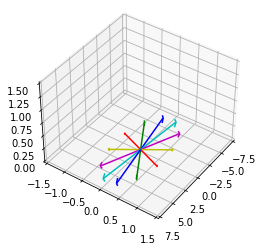

In [8]:
def plot_SigmaVTX(Sigma):
    Zt = Sigma.dot(Y.T)
    Z = Zt.T

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_xlim3d(-7.5, 7.5)
    ax.set_ylim3d(-1.5, 1.5)
    ax.set_zlim3d(0, 1.5)
    for i in range(12):
        cols = ['r', 'g', 'b', 'c', 'm', 'y']
        ax.quiver(0, 0, 0, Z[i][0], Z[i][1], Z[i][2], length = 1, normalize = False, color=cols[i%6], arrow_length_ratio=0.05)

    ax.view_init(elev=40., azim=35)

    plt.show()
    
    return Z

Z = plot_SigmaVTX(Sigma)

**e.** Now multiplying each vector with $U$:

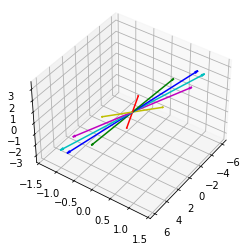

In [9]:
def plot_USigmaVTX():
    Qt = U.dot(Z.T)
    Q = Qt.T

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_xlim3d(-6.5, 6.5)
    ax.set_ylim3d(-1.5, 1.5)
    ax.set_zlim3d(-3.5, 3.5)
    for i in range(12):
        cols = ['r', 'g', 'b', 'c', 'm', 'y']
        ax.quiver(0, 0, 0, Q[i][0], Q[i][1], Q[i][2], length = 1, normalize = False, color=cols[i%6], arrow_length_ratio=0.05)

    ax.view_init(elev=40., azim=35)

    plt.show()
    
    return Q

Q = plot_USigmaVTX()

**f.** Proceeding similarly to before, we have the four following plots:

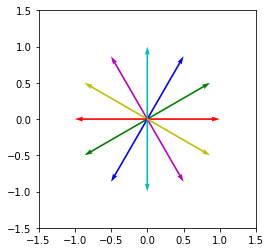

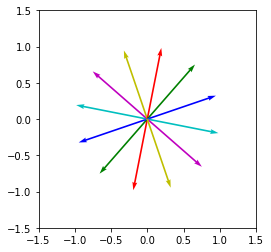

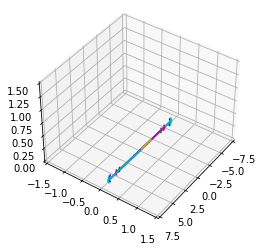

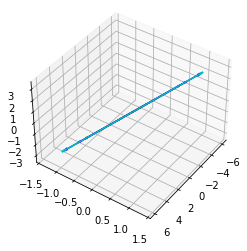

In [10]:
Sigmahat = np.zeros_like(Sigma)
Sigmahat[0] = Sigma[0]

plot_X()
Y = plot_VTX()
Z = plot_SigmaVTX(Sigmahat)
Q = plot_USigmaVTX()

**g.** We can observe that from the moment we multiply with the rank-1 matrix $\hat{\Sigma}$, we squeeze all of our vectors into a 1-dimensional subspace of $\mathbb{R}^3$, i.e., on a line. Multiplying with $\hat{A}$ is a summary of $A$ in the sense that it preserves only the contribution of the most significant (largest) singular value, while discarding the contributions of the less important ones. In a sense, it shows us an approximation by the most important value.

### Question 3

**a.**

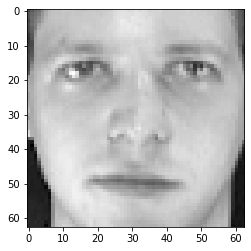

In [11]:
faces = datasets.fetch_olivetti_faces()
A_1 = faces["images"][0][:63, :63]
A_2 = faces["images"][110][:63, :63]
A_3 = faces["images"][365][:63, :63]
plt.imshow(A_1, cmap="gray")

**b.** To make our lives easier, we define the functions `create_patches()` and `create_face()` as follows:

In [12]:
def create_patches(face):
    patches = np.array([])
    for i in range(9):
        for j in range (9):
            patch = face[7*i:7*(i+1), 7*j:7*(j+1)]
            patch = patch.flatten()
            patches = np.append(patches, patch)
    return patches.reshape(81, 49)


def create_face(patches):
    face = np.array([])
    rows = []
    for i in range(9):
        row = patches[i*9]
        row = row.reshape(7, 7)
        for j in range(1, 9):
            patch = patches[i*9+j]
            patch = patch.reshape(7, 7)
            row = np.hstack((row, patch))
        rows.append(row)
    face = np.vstack(tuple(rows))
    return face

Then, it is trivial to get $B_1$, $B_2$ and $B_3$ using the `create_patches()` function:

In [13]:
B_1 = create_patches(A_1)
B_2 = create_patches(A_2)
B_3 = create_patches(A_3)

**c.** We compute a simple SVD decomposition using NumPy and then get the first 10 values from the `s` array, which are the square roots of the eigenvalues in descending order:

In [14]:
u, s, v = np.linalg.svd(B_1)
print(s[:10])

[41.16334656  3.83938243  1.99439961  1.3196773   1.183775    0.97274167
  0.85728607  0.71252501  0.67311105  0.61996824]


**d.** The visual representation of the first three columns of $V_1$ is presented below. It is not easy to interpret the first image, but the second and third images clearly show vertical and horizontal lines. This makes sense as in the sense that the columns of $V$ correspond to the horizontal "basis" of the image that will be used to reconstruct the image back.

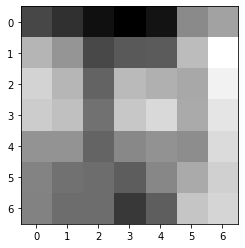

In [15]:
img1 = v.T[:, 0].reshape(7, 7)
img2 = v.T[:, 1].reshape(7, 7)
img3 = v.T[:, 2].reshape(7, 7)

plt.imshow(img1, cmap="gray")

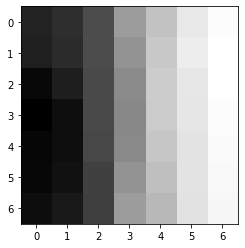

In [16]:
plt.imshow(img2, cmap="gray")

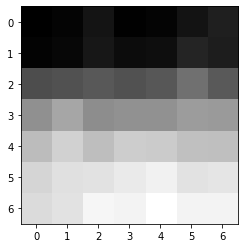

In [17]:
plt.imshow(img3, cmap="gray")

**e.** We take rank-k approximations by summing the products of the relevant singular values and outer products. We write a helper function which takes the matrix to be decomposed and the rank of the approximation to make the process easier. We then create the rank-1, rank-5, rank-10 and rank-20 approximations.

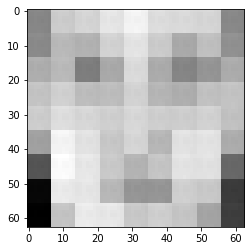

In [18]:
def svd_approx(B, k):
    approx = np.zeros((81, 49))
    for i in range(k):
        Ahat = s[i]*u[:,i].reshape((81,1)).dot(v[i, :].reshape((1,49)))
        approx += Ahat
    return approx

approx1 = svd_approx(B_1, 1)
face = create_face(approx1)
plt.imshow(face, cmap="gray")

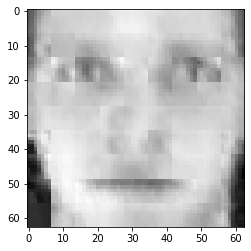

In [19]:
approx1 = svd_approx(B_1, 5)
face = create_face(approx1)
plt.imshow(face, cmap="gray")

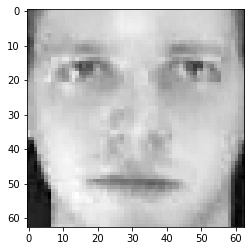

In [20]:
approx1 = svd_approx(B_1, 10)
face = create_face(approx1)
plt.imshow(face, cmap="gray")

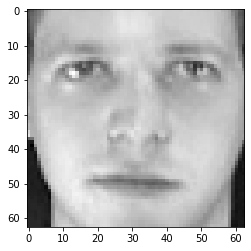

In [21]:
approx1 = svd_approx(B_1, 20)
face = create_face(approx1)
plt.imshow(face, cmap="gray")

**f.** Assuming all entries are non-zero for $U$ and $V$ (which may not really be the case, but we assume so for the sake of simplicity), for each additional rank of approximation, we need $81$ additional entries from $U$ and $49$ additional entries from $V$, in addition to a single singular value entry from $\Sigma$. This translates to an additional $\dfrac{81+49+1}{3969}=3.3\%$ of the values for each rank of approximation. Just by storing these values, with the cost of one vector outer product and one scalar multiplication, we can construct a good-enough approximation of the original image. This potentially saves a lot of space in image storage.

**g.** We find approximations $\hat{Y}_2$ and $\hat{Y}_3$ by multiplying $Y_2$ and $Y_3$ from the right by the right inverse $V_{1,(20)}$ (which is nothing but $V_{1,(20)}^T$ since $V_{1,(20)}$ is orthonormal):

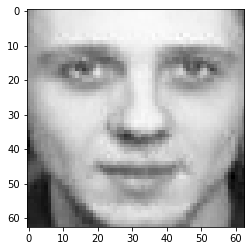

In [22]:
v20 = v.T[:, :20]

mpinv = np.linalg.pinv(v20.T)

Y2hat = B_2.dot(mpinv)
Y3hat = B_3.dot(mpinv)

B2hat = Y2hat.dot(v20.T)
B3hat = Y3hat.dot(v20.T)

A2hat = create_face(B2hat)
A3hat = create_face(B3hat)

plt.imshow(A2hat, cmap="gray")

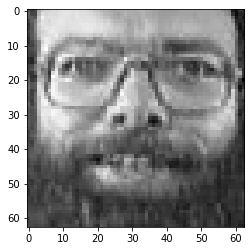

In [23]:
plt.imshow(A3hat, cmap="gray")

As can be seen, the approximations turned out to be decent enough. The fact that we can use the image $A_1$'s $V$ matrix is indeed quite interesting. I would guess that the reason we are able to do so is because we are using the components used to approximate a face to approximate yet other faces, which are posed and shot in a way very similar to the first one. In a completely non-rigorous, intuitive way, the "basis" (for lack of a better term) of the rank-20 approximation (which is quite a high rank, allowing for the representation of many fine-grained details) is good enough to approximate many faces. It is obvious though, that the approximation works better for $A_2$ than for $A_3$, because the face in $A_2$ looks much more like $A_1$, (a clear, unobstructed, bright male face) than $A_3$ does (a face obstructed by facial hair, glasses and overall different in facial structures).